In [ ]:
import pandas as pd

In [ ]:
data = pd.read_excel("/content/sentiment_beto_sample_bukele (1).xlsx")

In [ ]:
data.head()

,Post Type,Profile Name,Date,Time,Likes,Text,AP,AP + JA Revised,sentiment_output,sentiment_probability,English Text (Google Translate),Match
0,Astronaut Post,Elizabeth Menjivar,2024-04-13,03:29:29,43,Dios lo bendiga por ser un gran ser humano,POS,POS,POS,0.997756,God bless him for being a great human being.,True
1,Astronaut Post,Mila Mijango,2024-04-17,17:29:01,6,"Me encanta la humanidad de nuestro astronauta,...",POS,POS,POS,0.998780,"I love the humanity of our astronaut, a man wi...",True
2,Astronaut Post,Any Rodríguez,2024-04-13,04:00:29,18,Dos grandes hombres haciendo historia. Gracias...,POS,POS,POS,0.998589,Two great men making history. Thank you for al...,True
3,Astronaut Post,Sara Cespedes,2024-04-13,08:22:47,136,Nayib y Frank dos grandes ejemplo de umildad y...,POS,POS,POS,0.998770,"Nayib and Frank, two great examples of humilit...",True
4,Astronaut Post,Martha Morales,2024-04-13,03:13:56,70,A Colombia le falta un precidente con este ...,NEU,POS,POS,0.984938,"Colombia lacks a precedent with this one, I am...",False


In [ ]:
print(data.isnull().sum())

Post Type                          0
Profile Name                       0
Date                               0
Time                               0
Likes                              0
Text                               0
AP                                 0
AP + JA Revised                    4
sentiment_output                   0
sentiment_probability              0
English Text (Google Translate)    0
Match                              0
dtype: int64


In [ ]:
null_rows = data[data['AP + JA Revised'].isnull()]

print(null_rows)

                 Post Type       Profile Name        Date      Time  Likes  \
64          Astronaut Post     Julio Guerrero  2024-04-15  04:29:42      0   
72          Astronaut Post       Victor Velez  2024-04-14  05:01:12      0   
148                   Reel        Carlos Díaz  2024-04-18  00:53:50      7   
332  Google en El Salvador  Alejandra Rugerio  2024-04-18  05:23:21      0   

                                                  Text   AP AP + JA Revised  \
64   Guadalupe Ayala si y que siga  la dominacion’ ...  NEG             NaN   
72   Sara Cespedes porque se comen tanto la letra “...  NEG             NaN   
148  Allí es donde yo digo jefes a muchísimos,  líd...  NEU             NaN   
332  Cristian Morales Quesada México  está igual ya...  NEG             NaN   

    sentiment_output  sentiment_probability  \
64               POS               0.980958   
72               NEU               0.727363   
148              NEG               0.995871   
332              NEU     

In [ ]:
data = data.dropna(subset=['AP + JA Revised'])
print(data.isnull().sum())

Post Type                          0
Profile Name                       0
Date                               0
Time                               0
Likes                              0
Text                               0
AP                                 0
AP + JA Revised                    0
sentiment_output                   0
sentiment_probability              0
English Text (Google Translate)    0
Match                              0
dtype: int64


In [ ]:
print(data.describe())

            Likes  sentiment_probability
count  329.000000             329.000000
mean     6.492401               0.961176
std     13.579736               0.091408
min      0.000000               0.520591
25%      0.000000               0.980844
50%      2.000000               0.997453
75%      6.000000               0.998517
max    136.000000               0.999315


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 329 entries, 0 to 331
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Post Type                        329 non-null    object 
 1   Profile Name                     329 non-null    object 
 2   Date                             329 non-null    object 
 3   Time                             329 non-null    object 
 4   Likes                            329 non-null    int64  
 5   Text                             329 non-null    object 
 6   AP                               329 non-null    object 
 7   AP + JA Revised                  329 non-null    object 
 8   sentiment_output                 329 non-null    object 
 9   sentiment_probability            329 non-null    float64
 10  English Text (Google Translate)  329 non-null    object 
 11  Match                            329 non-null    bool   
dtypes: bool(1), float64(1), int

count     329.000000
mean      121.407295
std       143.325438
min         4.000000
25%        36.000000
50%        81.000000
75%       151.000000
max      1350.000000
Name: Text_Length, dtype: float64


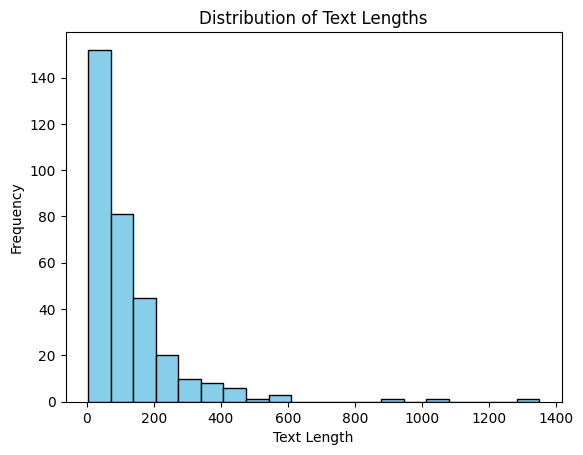

In [ ]:
import matplotlib.pyplot as plt

# Calculating text length
data['Text_Length'] = data['Text'].apply(len)

print(data['Text_Length'].describe())

#histogram of text lengths
plt.hist(data['Text_Length'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths')
plt.show()


In [ ]:
print(data['Post Type'].value_counts())
print(data['sentiment_output'].value_counts())
print(data['Likes'].value_counts())

Post Type
Astronaut Post           135
Google en El Salvador    127
Reel                      67
Name: count, dtype: int64
sentiment_output
POS    247
NEU     68
NEG     14
Name: count, dtype: int64
Likes
0      103
1       47
3       32
2       27
5       21
6       17
4        9
8        8
7        6
9        6
18       5
10       5
11       4
14       3
27       3
12       3
43       3
17       3
34       3
22       3
39       2
28       1
136      1
25       1
46       1
67       1
40       1
70       1
13       1
15       1
26       1
63       1
62       1
73       1
23       1
50       1
30       1
Name: count, dtype: int64


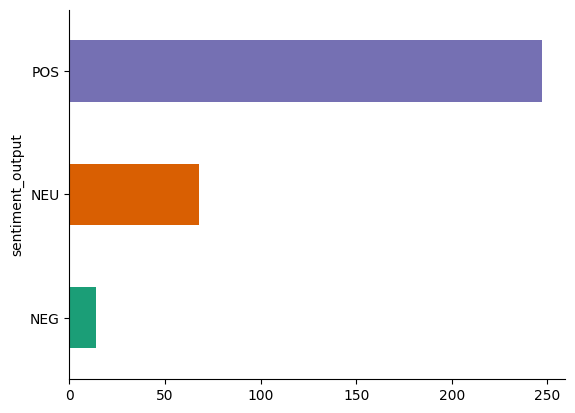

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('sentiment_output').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
#Sentiment_output

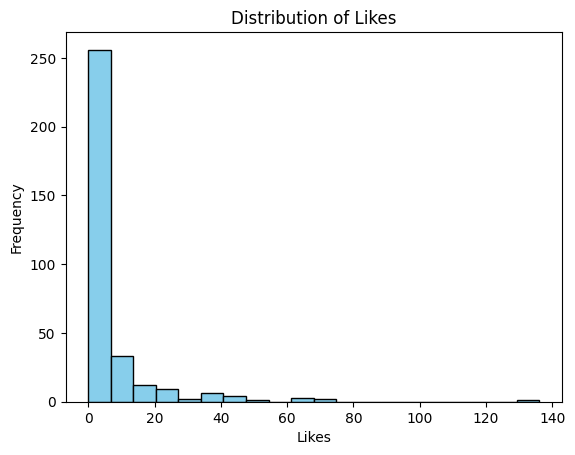

In [ ]:
plt.hist(data['Likes'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Likes')
plt.ylabel('Frequency')
plt.title('Distribution of Likes')
plt.show()


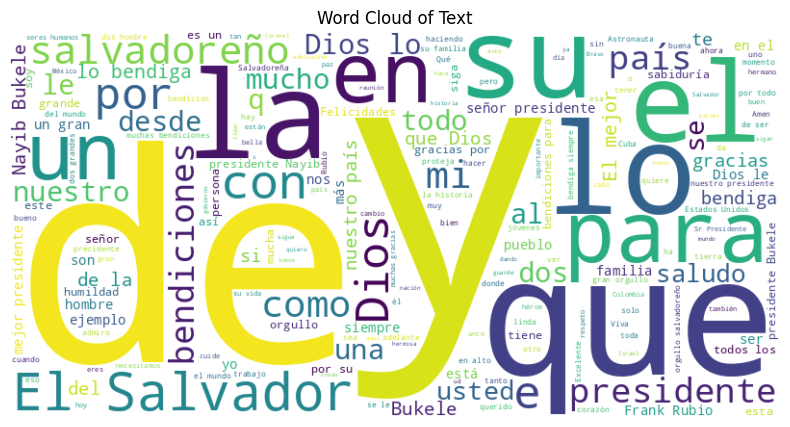

In [ ]:
from wordcloud import WordCloud
text = ' '.join(data['Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Text')
plt.show()

**Note:** Here, Word cloud provides a visual representation of the most frequent words in the 'text' column. Larger and bolder words indicate higher frequency.

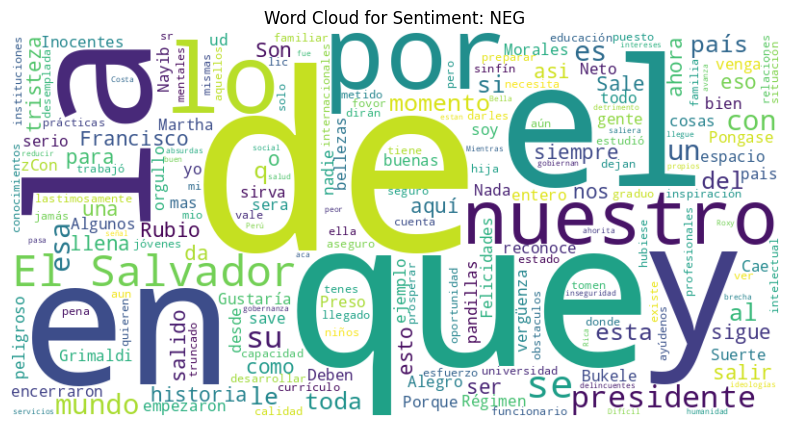


Top 10 words for sentiment 'NEG':
Top words: de que el en a y la no por con
de: 20
que: 14
el: 13
en: 13
a: 10
y: 9
la: 9
no: 8
por: 8
con: 4


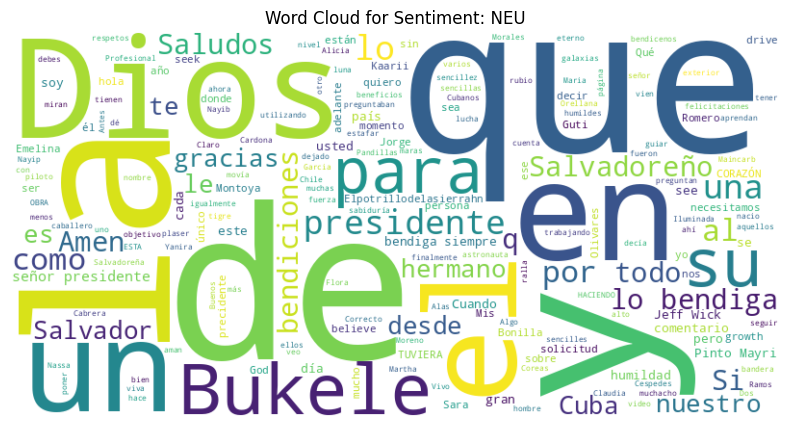


Top 10 words for sentiment 'NEU':
Top words: de y a que la en Dios un para presidente
de: 18
y: 17
a: 15
que: 14
la: 12
en: 11
Dios: 11
un: 9
para: 8
presidente: 8


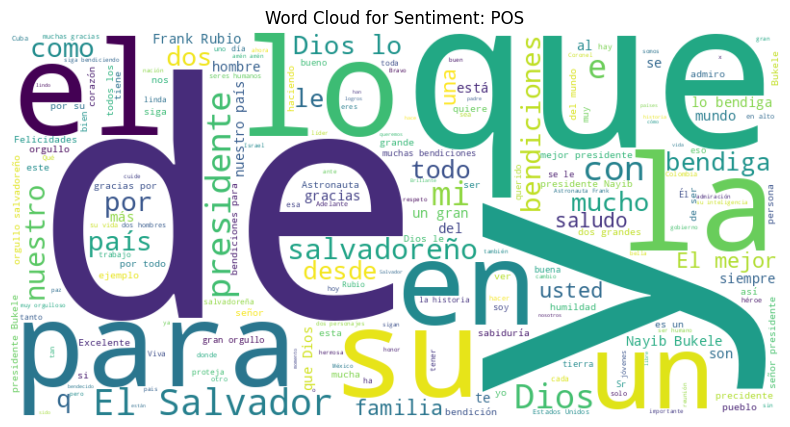


Top 10 words for sentiment 'POS':
Top words: y de que a Dios el para lo su un
y: 218
de: 193
que: 139
a: 108
Dios: 89
el: 87
para: 83
lo: 81
su: 80
un: 73


In [ ]:
from collections import Counter

def get_top_words(text, n=10):
    words = text.split()
    word_counts = Counter(words)
    top_words = word_counts.most_common(n)
    return top_words

grouped_data = data.groupby('sentiment_output')


for sentiment, group in grouped_data:

    text = ' '.join(group['Text'])


    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)


    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Sentiment: {sentiment}')
    plt.axis('off')
    plt.show()


    top_words = get_top_words(text)
    print(f"\nTop 10 words for sentiment '{sentiment}':")
    top_word_string = ' '.join([word for word, _ in top_words])
    print(f"Top words: {top_word_string}")
    for word, count in top_words:
        print(f"{word}: {count}")


In [ ]:
!pip install gensim
!pip install pyLDAvis


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 15.5 MB/s eta 0:00:00


In [ ]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from pprint import pprint


tokenized_text = [text.split() for text in data['Text']]

# Created a dictionary from the tokenized text
dictionary = Dictionary(tokenized_text)
dictionary.filter_extremes(no_below=5, no_above=0.2) # Filtering out words that appear in less than 5 documents or more than 20% of the documents
corpus = [dictionary.doc2bow(text) for text in tokenized_text]  # Converting tokenized documents into a document-term matrix
num_topics = 5  #Set the number of topics(can set any)

#LDA model
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)


pprint(lda_model.print_topics()) # Printing the topics and associated words

# Visualize the topics
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.050*"El" + 0.040*"mejor" + 0.037*"su" + 0.036*"le" + 0.031*"q" + '
  '0.029*"te" + 0.028*"Presidente" + 0.023*"familia" + 0.023*"la" + '
  '0.022*"mi"'),
 (1,
  '0.049*"me" + 0.045*"las" + 0.044*"Que" + 0.031*"por" + 0.030*"bendiga" + '
  '0.030*"Bukele" + 0.030*"El" + 0.027*"Gracias" + 0.027*"desde" + 0.024*"un"'),
 (2,
  '0.053*"un" + 0.050*"por" + 0.044*"gran" + 0.042*"nuestro" + 0.037*"país" + '
  '0.036*"bendiciones" + 0.034*"su" + 0.032*"orgullo" + 0.030*"gracias" + '
  '0.029*"muchas"'),
 (3,
  '0.076*"la" + 0.045*"los" + 0.036*"por" + 0.029*"un" + 0.024*"," + '
  '0.023*"todos" + 0.023*"es" + 0.022*"mucho" + 0.021*"se" + 0.021*"cada"'),
 (4,
  '0.053*"su" + 0.043*"la" + 0.040*"los" + 0.029*"un" + 0.028*"por" + '
  '0.024*"nuestro" + 0.023*"dos" + 0.023*"con" + 0.022*"es" + 0.019*"bendiga"')]


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.016635 -0.004885       1        1  30.913610
0      0.079484 -0.084014       2        1  23.898432
2     -0.151626 -0.093542       3        1  17.583120
3      0.123510  0.026015       4        1  14.632933
1     -0.068003  0.156426       5        1  12.971905, topic_info=      Term       Freq      Total Category  logprob  loglift
101    las  22.000000  22.000000  Default  30.0000  30.0000
9       la  89.000000  89.000000  Default  29.0000  29.0000
51      me  21.000000  21.000000  Default  28.0000  28.0000
1     gran  27.000000  27.000000  Default  27.0000  27.0000
102  mejor  29.000000  29.000000  Default  26.0000  26.0000
..     ...        ...        ...      ...      ...      ...
147      q   5.054532  29.178431   Topic5  -4.2376   0.2892
9       la   5.823573  89.343451   Topic5  -4.0960  -0.6882
73    como   4.466627  36.661114   Topic5  -4.3612  -0.0627
36      mi   4.281826  31.991342   Topic5  -4.4035   0.0313
7      con   4.036443  47.939423   Topic5  -4.4625  -0.4322

[262 rows x 6 columns], token_table=      Topic      Freq Term
term                      
156       1  0.125226    ,
156       4  0.626129    ,
156       5  0.250451    ,
113       1  0.133140    .
113       2  0.133140    .
...     ...       ...  ...
163       1  0.177743   él
163       3  0.710972   él
154       1  0.132843   ❤️
154       2  0.132843   ❤️
154       4  0.664214   ❤️

[453 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 3, 4, 2])

In [ ]:
from gensim.parsing.preprocessing import remove_stopwords
from gensim.parsing.preprocessing import PorterStemmer

# Tokenize the text data and apply preprocessing (remove stopwords and stemming)
porter = PorterStemmer()
tokenized_text = [[porter.stem(token) for token in remove_stopwords(text).split()] for text in data['Text']]

# Create a dictionary from the tokenized text
dictionary = Dictionary(tokenized_text)

# Filter out words that appear in less than 5 documents or more than 50% of the documents
dictionary.filter_extremes(no_below=5, no_above=0.5)

# Convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in tokenized_text]

# Set the number of topics
num_topics = 5

# Build LDA model
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Print the topics and associated words
pprint(lda_model.print_topics())

# Visualize the topics
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.050*"gran" + 0.049*"que" + 0.039*"orgullo" + 0.039*"es" + 0.036*"la" + '
  '0.036*"saludo" + 0.031*"salvadoreño" + 0.029*"mucha" + 0.022*"precident" + '
  '0.022*"gracia"'),
 (1,
  '0.089*"y" + 0.076*"dio" + 0.057*"su" + 0.051*"lo" + 0.045*"que" + '
  '0.043*"le" + 0.032*"el" + 0.031*"bendiga" + 0.031*"la" + 0.027*"president"'),
 (2,
  '0.113*"president" + 0.105*"el" + 0.069*"bukel" + 0.059*"mejor" + '
  '0.040*"salvador" + 0.037*"que" + 0.034*"gracia" + 0.032*"nayib" + '
  '0.029*"paí" + 0.024*"mi"'),
 (3,
  '0.086*"y" + 0.060*"que" + 0.049*"el" + 0.047*"la" + 0.044*"lo" + 0.042*"en" '
  '+ 0.029*"por" + 0.029*"su" + 0.028*"para" + 0.021*"todo"'),
 (4,
  '0.073*"lo" + 0.045*"que" + 0.037*"nuestro" + 0.036*"no" + 0.036*"q" + '
  '0.033*"ser" + 0.032*"do" + 0.031*"el" + 0.028*"para" + 0.027*"y"')]


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.006875  0.048286       1        1  41.831943
1     -0.017644  0.137242       2        1  24.201136
4      0.086554  0.032760       3        1  13.344109
2     -0.209262 -0.082834       4        1  11.548727
0      0.133476 -0.135454       5        1   9.074086, topic_info=          Term        Freq       Total Category  logprob  loglift
60   president  101.000000  101.000000  Default  30.0000  30.0000
32          el  174.000000  174.000000  Default  29.0000  29.0000
39       bukel   36.000000   36.000000  Default  28.0000  28.0000
102      mejor   33.000000   33.000000  Default  27.0000  27.0000
4           lo  161.000000  161.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
33          en    7.196178   95.140723   Topic5  -3.8831  -0.1821
59        para    6.807095   90.730665   Topic5  -3.9386  -0.1902
1          dio    7.192824  110.462676   Topic5  -3.8835  -0.3318
5          por    5.785636   77.158632   Topic5  -4.1012  -0.1907
60   president    4.106812  101.903168   Topic5  -4.4440  -0.8116

[270 rows x 6 columns], token_table=      Topic      Freq Term
term                      
157       1  0.932366    ,
109       1  0.395134    .
109       4  0.263423    .
109       5  0.263423    .
62        3  0.353641    2
...     ...       ...  ...
131       1  0.102199   él
131       2  0.715391   él
131       3  0.102199   él
154       1  0.395944   ❤️
154       5  0.527925   ❤️

[413 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 5, 3, 1])